In [1]:
import numpy as np
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import eva as evaluation 
sys.path.append("../Preprocessing")
import Prep as prep

In [2]:
label = np.loadtxt('../Data/label_enc.csv', delimiter=',', skiprows= 0)
train = np.genfromtxt('../Data/train_enc.csv', delimiter=',', skip_header = True)
print(train.shape)

In [ ]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('../Data/train_enc.csv', delimiter=',')
sns.heatmap(df.isnull(), cmap="YlGnBu", annot=True, fmt="d")

In [3]:
train = prep.missing_point(train)

In [4]:
x_data, label = prep.mutual_info(train, label)
print(x_data.shape)

(76878, 38)


In [11]:
X_train, X_test, y_train, y_test = prep.split_train_test(x_data, label)

In [6]:
class_weights = prep.get_weight(y_train)
sample_weight = prep.get_sample('balanced',y_train)

In [7]:
X_train, y_train = prep.Outlier(X_train, y_train)
print(X_train.shape)
class_weight = {0: class_weights[0], 1: class_weights[1]}

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


(57658, 38)


/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc_train =  0.6910055846543411
              precision    recall  f1-score   support

     class 1       0.96      0.69      0.81     53475
     class 2       0.14      0.65      0.23      4183

   micro avg       0.69      0.69      0.69     57658
   macro avg       0.55      0.67      0.52     57658
weighted avg       0.90      0.69      0.76     57658

auc =  0.6714510132901746
acc_test =  0.6650884495317377
              precision    recall  f1-score   support

     class 1       0.96      0.67      0.79     17683
     class 2       0.14      0.64      0.23      1537

   micro avg       0.67      0.67      0.67     19220
   macro avg       0.55      0.65      0.51     19220
weighted avg       0.89      0.67      0.74     19220

f1 score = 0.7415790638636355


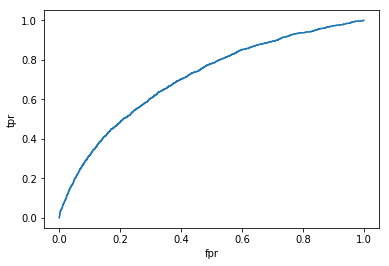

In [8]:
clf = LogisticRegression(class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.9269312150959104
              precision    recall  f1-score   support

     class 1       0.93      1.00      0.96     53475
     class 2       0.42      0.02      0.04      4183

   micro avg       0.93      0.93      0.93     57658
   macro avg       0.68      0.51      0.50     57658
weighted avg       0.89      0.93      0.90     57658

auc =  0.5089747220349247
acc_test =  0.9196149843912591
              precision    recall  f1-score   support

     class 1       0.92      1.00      0.96     17683
     class 2       0.44      0.02      0.04      1537

   micro avg       0.92      0.92      0.92     19220
   macro avg       0.68      0.51      0.50     19220
weighted avg       0.88      0.92      0.88     19220

f1 score = 0.8846182769067007


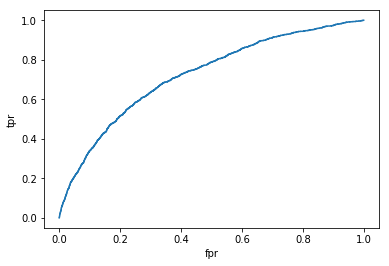

In [9]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.7)
clf.fit(X_train, y_train, sample_weight)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.7402441985500711
              precision    recall  f1-score   support

     class 1       0.97      0.75      0.84     53475
     class 2       0.17      0.67      0.27      4183

   micro avg       0.74      0.74      0.74     57658
   macro avg       0.57      0.71      0.56     57658
weighted avg       0.91      0.74      0.80     57658

auc =  0.7092346176899597
acc_test =  0.7078563995837669
              precision    recall  f1-score   support

     class 1       0.96      0.72      0.82     17683
     class 2       0.16      0.61      0.25      1537

   micro avg       0.71      0.71      0.71     19220
   macro avg       0.56      0.66      0.53     19220
weighted avg       0.89      0.71      0.77     19220

f1 score = 0.7731599237230794


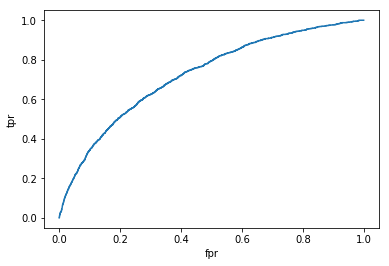

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=32, max_depth=8,class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

In [12]:
x_data, label = prep.ExtraTrees(train, label)
print(x_data.shape)

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(76878, 184)


In [13]:
X_train, X_test, y_train, y_test = prep.split_train_test(x_data, label)

In [14]:
class_weights = prep.get_weight(y_train)
sample_weight = prep.get_sample('balanced',y_train)
class_weight = {0: class_weights[0], 1: class_weights[1]}

In [15]:
X_train, y_train = prep.Outlier(X_train, y_train)
print(X_train.shape)

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


(57658, 184)


/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


acc_train =  0.6637066842415623
              precision    recall  f1-score   support

     class 1       0.96      0.66      0.79     53565
     class 2       0.13      0.65      0.22      4093

   micro avg       0.66      0.66      0.66     57658
   macro avg       0.55      0.66      0.50     57658
weighted avg       0.90      0.66      0.75     57658

auc =  0.6572134218448424
acc_test =  0.622216441207076
              precision    recall  f1-score   support

     class 1       0.95      0.62      0.75     17670
     class 2       0.12      0.61      0.21      1550

   micro avg       0.62      0.62      0.62     19220
   macro avg       0.54      0.62      0.48     19220
weighted avg       0.88      0.62      0.71     19220

f1 score = 0.708099440179371


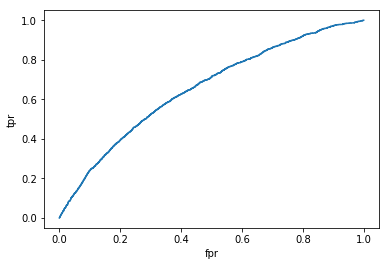

In [16]:
clf = LogisticRegression(class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.92941135662007
              precision    recall  f1-score   support

     class 1       0.93      1.00      0.96     53565
     class 2       0.55      0.03      0.06      4093

   micro avg       0.93      0.93      0.93     57658
   macro avg       0.74      0.52      0.51     57658
weighted avg       0.90      0.93      0.90     57658

auc =  0.5154461121864471
acc_test =  0.9182622268470343
              precision    recall  f1-score   support

     class 1       0.92      1.00      0.96     17670
     class 2       0.41      0.03      0.06      1550

   micro avg       0.92      0.92      0.92     19220
   macro avg       0.67      0.51      0.51     19220
weighted avg       0.88      0.92      0.88     19220

f1 score = 0.8849889544961538


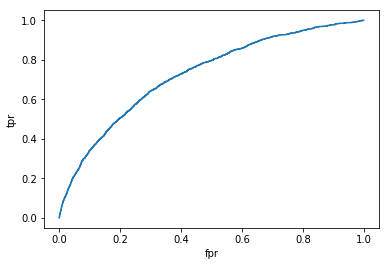

In [17]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.7)
clf.fit(X_train, y_train, sample_weight)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.8016060217142461
              precision    recall  f1-score   support

     class 1       0.97      0.81      0.88     53565
     class 2       0.22      0.68      0.33      4093

   micro avg       0.80      0.80      0.80     57658
   macro avg       0.59      0.75      0.61     57658
weighted avg       0.92      0.80      0.84     57658

auc =  0.7459861291344212
acc_test =  0.7569198751300729
              precision    recall  f1-score   support

     class 1       0.95      0.78      0.85     17670
     class 2       0.17      0.51      0.25      1550

   micro avg       0.76      0.76      0.76     19220
   macro avg       0.56      0.64      0.55     19220
weighted avg       0.88      0.76      0.81     19220

f1 score = 0.8062495226080836


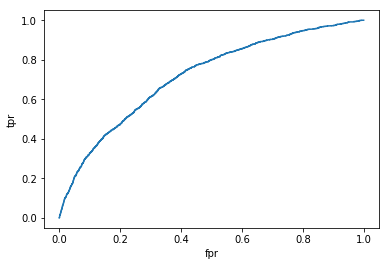

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=32, max_depth=8,class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

In [19]:
x_data, label = prep.fclassif(train, label)
print(x_data.shape)

(76878, 38)


/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 22 106 145 149 237 250 334 336 341 371 373 374] are constant.
  UserWarning)
/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [20]:
X_train, X_test, y_train, y_test = prep.split_train_test(x_data, label)

In [21]:
class_weights = prep.get_weight(y_train)
sample_weight = prep.get_sample('balanced',y_train)
class_weight = {0: class_weights[0], 1: class_weights[1]}

In [22]:
X_train, y_train = prep.Outlier(X_train, y_train)
print(X_train.shape)

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


(57658, 38)


/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc_train =  0.6902077768913247
              precision    recall  f1-score   support

     class 1       0.96      0.69      0.81     53560
     class 2       0.14      0.65      0.23      4098

   micro avg       0.69      0.69      0.69     57658
   macro avg       0.55      0.67      0.52     57658
weighted avg       0.90      0.69      0.77     57658

auc =  0.6726899649768134
acc_test =  0.6651404786680541
              precision    recall  f1-score   support

     class 1       0.95      0.67      0.78     17609
     class 2       0.15      0.65      0.25      1611

   micro avg       0.67      0.67      0.67     19220
   macro avg       0.55      0.66      0.51     19220
weighted avg       0.89      0.67      0.74     19220

f1 score = 0.7396113661827877


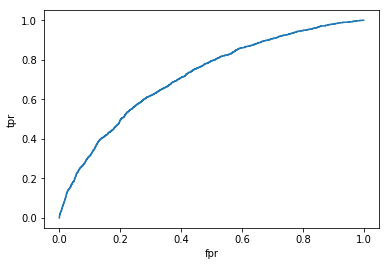

In [23]:
clf = LogisticRegression(class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.9289604217974956
              precision    recall  f1-score   support

     class 1       0.93      1.00      0.96     53560
     class 2       0.50      0.03      0.06      4098

   micro avg       0.93      0.93      0.93     57658
   macro avg       0.72      0.51      0.51     57658
weighted avg       0.90      0.93      0.90     57658

auc =  0.5137650709229552
acc_test =  0.9162851196670135
              precision    recall  f1-score   support

     class 1       0.92      1.00      0.96     17609
     class 2       0.51      0.03      0.06      1611

   micro avg       0.92      0.92      0.92     19220
   macro avg       0.71      0.51      0.51     19220
weighted avg       0.88      0.92      0.88     19220

f1 score = 0.8808620721784962


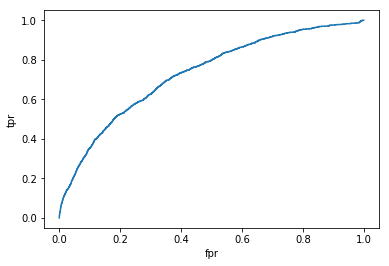

In [24]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.7)
clf.fit(X_train, y_train, sample_weight)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.766120919907038
              precision    recall  f1-score   support

     class 1       0.97      0.77      0.86     53560
     class 2       0.19      0.68      0.29      4098

   micro avg       0.77      0.77      0.77     57658
   macro avg       0.58      0.73      0.58     57658
weighted avg       0.91      0.77      0.82     57658

auc =  0.7269590559667533
acc_test =  0.7316857440166493
              precision    recall  f1-score   support

     class 1       0.95      0.74      0.84     17609
     class 2       0.18      0.61      0.27      1611

   micro avg       0.73      0.73      0.73     19220
   macro avg       0.57      0.67      0.55     19220
weighted avg       0.89      0.73      0.79     19220

f1 score = 0.7883877200765411


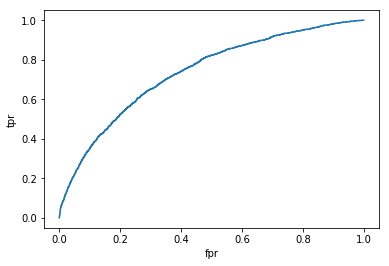

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=32, max_depth=8,class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)